[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/bads/blob/master/demo_notebooks/2_nb_descriptive_analytics.ipynb) 

# Chapter 2 - Foundations of descriptive analytics
The second lecture has offered an overview of the field of descriptive analytics. Out of the space of methods for descriptive analytics, the lecture concentrated on cluster analysis. Given this focus in the lecture, the tutorial will revisit the **kMeans** algorithm and deepen our understanding how it segments a given data set. This will also help us to introduce some more Python functionality and further develop our understanding of Python programming and relevant libraries. 

*Need to remember that Notebooks are a blend of text, and code, and results*

Here is the outline of the tutorial:
*   Generating data for cluster analysis 
*   kMeans Algorithm from Scratch
*   kMeans Algorithm using sklearn
*   Finding the optimal "k"

# Cluster Analysis

Cluster analysis is a good example of unsupervised machine learning or machine learning with unlabeled data (no specified target variable). Unsupervised learning algorithms attempt to group observations based on their similarities in features values. In the end, we can try to describe clusters and how they differ from one another. That task, however, is not supported by the algorithm and requires domain expertise. 

An example of this application could be analyzing data from a survey. We may have several distinct groups of potential buyers who reveal distinct preferences through their choices. Cluster analysis can group similar responses and thereby identify groups of buyers with similar preferences. We can then characterize the clusters and develop targeted marketing initiatives.

## Data Generation for cluster analysis

In order to verify that this method of analysis works, we can generate data using sklearn. The function `make_blob()` allows us to create a data for clustering. In a nutshell, we generate data from two Gaussian distributions. The function allows specifying the parameters of these Gaussians. This way, we can decide how similar or how dissimilar we want our data to be. Have a look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) to appreciate the full functionality of the function. 

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from sklearn.datasets import make_blobs

np.random.seed(888)

In [56]:
# Generate data in two dimensions using make_blobs:

# Let us first specify some parameters. It is good practice to play with these and verify the effect of such changes
n       = 500                 # no. samples
centers = [(-2, -2), (2, 2)]  # centers of the two Gaussians
std     = 2                   # standard deviaton

# Call the function and obtain your data
X, y = make_blobs(n_samples = n, centers = centers, cluster_std = std)

In [57]:
X.shape, y.shape # ensure shape is as expected

((500, 2), (500,))

In [58]:
X[:5] # since X is a NumPy array, use slicing to inspect the data instead of .head() as we would for a pandas DataFrame

array([[-0.26824611, -1.07418431],
       [-4.12196836, -1.73630937],
       [-1.64115373, -4.52581442],
       [ 1.14398146, -0.26504303],
       [ 1.02066215, -1.76253437]])

The function `make_blobs()` also provides a **true cluster assignment** for every data point in the array `y`. By the way we called that function, we have implicitly asked it to create data points for two different clusters. Make sure you understand how that has happened. Which part of the above code would we need to change and how to generate data from, say three different clusters? Check the documentation of `make_blobs()` and/or run a web search to answer this question. As always, it is good practice to play with our demo codes. Try generating and plotting data from three, four, or five different clusters.

In [59]:
y[:5] # true cluster assignment for each data point

array([0, 0, 0, 1, 0])

A picture says more than a thousand words, they say. So let's take a look at our data. Fortunately, we created two-dimensional data so plotting should be easy. We can make use of the variable `y` to color the plot. Recall that the array `y`, which is of the same length as X that specifies, for each data point, to which Gaussian (i.e., cluster) it belongs.

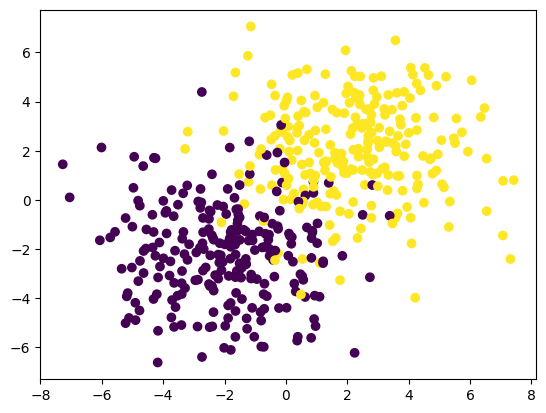

In [60]:
plt.scatter(X[:,0], X[:,1], c = y);  # note the coloring of the data points using the label y

Ok, given the way in which we generated our data, kMeans should have an easy go with it. Play a bit with the parameters that we set above and inspect how the graph (i.e., the data) changes. You can make the clustering task easier or harder. 

Just for fun, we can also verify the (true) mean vectors.

In [61]:
np.mean(X[y == 1], axis = 0) # there are two groups based on y values, here are the mean values for each feature for y=1

array([2.17611866, 2.02218582])

In [62]:
np.mean(X[y == 0], axis = 0) # here are the mean values for each feature for y=0

array([-1.95229636, -2.16294628])

Well, the data was generated randomly. So some variation is to be expected. If you increase the size of the sample, then the means should approach the values we set above for the parameter `centers`. In case this statement somewhat puzzles you, pause for a while, re-read the previous explanations and codes, and convince yourself that the empirical mean values for the two clusters should approach [-2, -2] and [2, 2], respectively.

# The kMeans algorithm

The kMeans algorithm is an established and widely used method for clustering. Much more sophisticated algorithms exist, many of which are readily available in Python libraries. However, it is good practice to start simple. For the purpose of BADS, knowing kMeans and what clustering in general can do for us is enough. 

kMeans belongs to the family of non-hierarchical cluster analysis methods. K random centroids are created somewhere in the feature space. Then, all data points are assigned to the **nearest centroid** (using some measure of distance). This assignment provides an **initial cluster solution**. Every data point is attached to one cluster. Based on this cluster solution, we **update the centroids**. More specifically, we calculate the updated centroid of each cluster by finding the **empirical mean of the features** across all data points attachted to that cluster.  After updating the centroids, we repeat the assignment of data points to the nearest (updated) centroid. The **two-phase process** of updating centroids given a cluster solution, and updating cluster solutions given centroids **repeats** itself until some stopping criterion is met. For example, we can terminate the algorithm once we observe that cluster solutions/centroids stop changing. 

The results of kMeans, that is the cluster solution, may differ based on the initial random selection of centroids. Therefore, it is important to invoke the algorithm multiple times with different random starting points. Then, we can average over all runs in the end. Else, and less likely, we could select the *best* solution based on the kMeans objective function. Recall from the lecture that the best solution is the one in which the total sum of the the intra-cluster variances is smallest. 

## kMeans with sklearn

As with most popular machine learning algorithms, the library sklearn has an easy way to implement the kMeans algorithm. We simply have to import the KMeans function from the sklearn.cluster library.

The documentation for this function can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html. Once you create a KMeans object, you can use many methods and attributes to fit, predict and evaluate your model.

In [63]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, init='random', n_init=20, max_iter=100, random_state=888) # create KMeans object with certain settings

res = km.fit_predict(X) # fit to X and also predict labels of X, not using the easier X_simple

In [64]:
km.cluster_centers_ # here are the centroids for kMeans, these display average value for each feature of the cluster

array([[ 2.23966741,  2.20170647],
       [-1.96538449, -2.28858345]])

In [65]:
km.n_iter_ # this is the number of iterations required for stability in this solution

7

In [66]:
km.inertia_ # here is a value similar to total distance for the clusters

3433.702159868973

In [67]:
km.labels_[:10] # here are the labels for each observation from the clustering

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int32)

In [68]:
y[:10]  # here, the labels done by kMeans are consistent with our y values, they can sometimes be flipped so be careful

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

Again, sklearn may have correctly split groups but chooses labels for them arbitrarily. In case our groups do not correspond with the y labels, we can simply reverse the labels.

In [76]:
results_corrected_sk = 1 - km.labels_
results_corrected_sk[:10]

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int32)

In [77]:
Counter(results_corrected_sk[y == 1]) # we have a similar level of purity as we had before with the original dataset

Counter({1: 231, 0: 19})

In [78]:
Counter(results_corrected_sk[y == 0])

Counter({0: 234, 1: 16})

Let's finish the demo with re-producing our scatter plot.

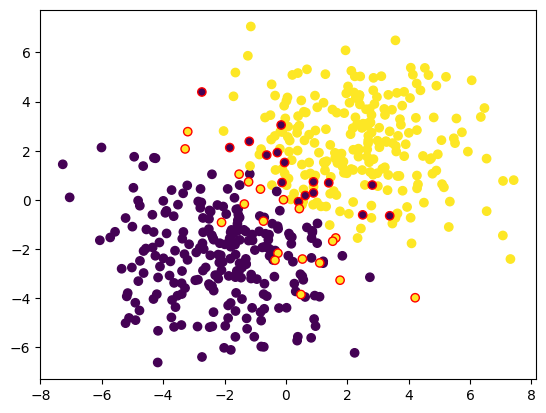

In [79]:
idx = results_corrected_sk == y  # index of the correctly clustered data points
plt.scatter(X[idx, 0],  X[idx, 1],  c=y[idx]);  # plot these points
plt.scatter(X[~idx, 0], X[~idx, 1], c=y[~idx], edgecolor='red', linewidths=1);  # highlight wrongly clustered data points  

### Optimal K in sklearn

We can perform the same elbow curve method on sklearn results. The `.inertia_` attribute on a fit kMeans object allows us to see the sum of squared distance between points and their centroid.

In [80]:
list_total_dist_sklearn = []

for i in range(1,9):
  km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=100, random_state=123) # go from 1 to 8 in the value of centroids
  res = km.fit_predict(X)
  list_total_dist_sklearn.append(km.inertia_) # check how inertia (~total distance) changes as we increase K

list_total_dist_sklearn

[8163.66658433281,
 3433.702159868973,
 2792.809988854923,
 2143.643602613751,
 1772.1889361680057,
 1474.739725167366,
 1268.2840420908033,
 1091.1266283103882]

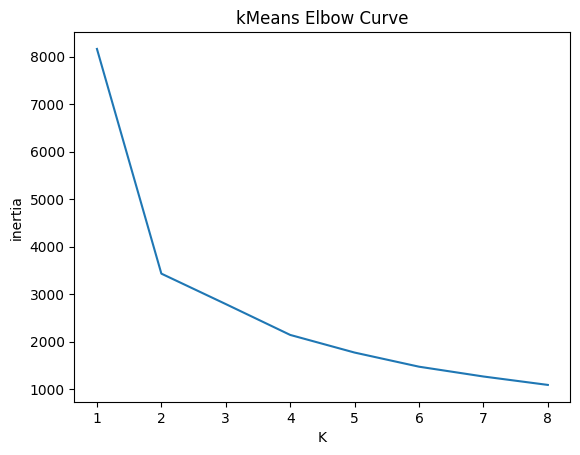

In [81]:
plt.plot(range(1, 9), list_total_dist_sklearn) # from this graph, we can see the sharpest bend at 2 again
plt.title("kMeans Elbow Curve")
plt.ylabel("inertia")
plt.xlabel("K")
plt.show()

We can see the sharpest kink at K=2. 

An implementation of the kMeans algorithm from scratch can be found in the folder "algorithms_from_scratch" or via this [link](https://github.com/Humboldt-WI/bads/blob/master/algorithms_from_scratch/kmeans.ipynb).

# Conclusion

kMeans is just one out of many powerful clustering algorithms. However, each cluster method performs descriptive analytics in that it groups data points into homogeneous subgroups. Hence, the output that you can expect from any cluster method is pretty much the same that we illustrated here for the case of kMeans. 

Here is a quick overview of useful `sklearn` functions for synthetic data creation and kMeans:

| Goal | `sklearn` Implementation |
| --- | --- |
| Generate distinct groups of data | `make_blobs(n_samples=n, centers=k, cluster_std=std)` |
| Generate kMeans | `KMeans(n_clusters=k)` |
| Fit and predict model on new data | `model_name.fit_predict(X)` |
| Predict model on new data | `model_name.predict(X)` |
| Get centroid coordinates | `model_name.cluster_centers` |
| Total distance in model | `model_name.inertia_` |
| Number of iterations to achieve stability | `model_name.n_iter_` |
| Labels for training data| `model_name.labels_` |

Check documentation for each function to see all the potential additional options which can be very useful for your specific needs.